<a href="https://colab.research.google.com/github/Manikanta898/upliance.ai_Assignment/blob/main/upliance_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    



##### **Project Type**    - Data Analytics Assignment
##### **Contribution**    - Individual


# **Project Objective & Summary**

To gain insights from the dataset related to user behavior,
cooking preferences, and order trends and creating the visualizations to showcase key insights. The process involves in
cleaning and merging the data, analyzing the relationship between
cooking sessions and user orders, identifying popular dishes, and exploring
demographic factors that influence user behavior.

# **GitHub Link**

https://github.com/Manikanta898/upliance.ai_Assignment

### Import Libraries

In [69]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [70]:
# Load Dataset
path='/content/Assignment.xlsx'
df = pd.read_excel(path, sheet_name = None)
# Extract individual sheets from the dictionary
user_details = df['UserDetails.csv']
cooking_sessions = df['CookingSessions.csv']
order_details = df['OrderDetails.csv']

# Merge UserDetails with CookingSessions based on 'User ID'
merged_sessions = pd.merge(user_details, cooking_sessions, on='User ID', how='inner')

# Merge the result with OrderDetails based on 'User ID', 'Session ID','Dish Name','Meal Type'
final_merged_data = pd.merge(merged_sessions, order_details, on=['User ID', 'Session ID','Dish Name','Meal Type'], how='inner')

# convert the final data
final_merged_data.to_csv('final_merged_data.csv', index = False)

### Dataset Information

In [71]:
# Dataset First Look
final_merged_data.head()

,User ID,User Name,Age,Location,Registration Date,Phone,Email,Favorite Meal,Total Orders,Session ID,...,Session Start,Session End,Duration (mins),Session Rating,Order ID,Order Date,Order Status,Amount (USD),Time of Day,Rating
0,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S001,...,2024-12-01 19:00:00,2024-12-01 19:30:00,30,4.5,1001,2024-12-01,Completed,15.0,Night,5.0
1,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S004,...,2024-12-02 07:30:00,2024-12-02 08:00:00,30,4.2,1004,2024-12-02,Completed,8.0,Morning,4.0
2,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S009,...,2024-12-05 19:00:00,2024-12-05 19:40:00,40,4.9,1009,2024-12-05,Completed,12.0,Night,5.0
3,U002,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8,S002,...,2024-12-01 12:00:00,2024-12-01 12:20:00,20,4.0,1002,2024-12-01,Completed,10.0,Day,4.0
4,U002,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8,S006,...,2024-12-03 18:30:00,2024-12-03 19:00:00,30,4.3,1006,2024-12-03,Completed,14.0,Night,4.0


In [72]:
# checking for count of rows and columns
final_merged_data.shape

(16, 22)

In [73]:
# Checking for duplicate rows
final_merged_data.duplicated().sum()

0

In [74]:
# checking for null or N/A values
final_merged_data.isna().sum()

,0
User ID,0
User Name,0
Age,0
Location,0
Registration Date,0
Phone,0
Email,0
Favorite Meal,0
Total Orders,0
Session ID,0


The dataset has 16 rows and 22 columns with missing values in Rating column.

### Data Wrangling Code

In [75]:
# Handle missing values (filling or dropping)
df = final_merged_data.dropna(subset=['Rating'])  # Dropping rows where Rating is missing and storing the new data into df

# Chart 1 - Total Orders by Location

In [76]:
#Number of Orders for each city
df.groupby("Location")["Total Orders"].sum().reset_index().sort_values(by='Total Orders', ascending=False)

,Location,Total Orders
5,New York,36
3,Los Angeles,24
6,San Francisco,20
7,Seattle,18
2,Chicago,15
1,Boston,14
0,Austin,7
4,Miami,5


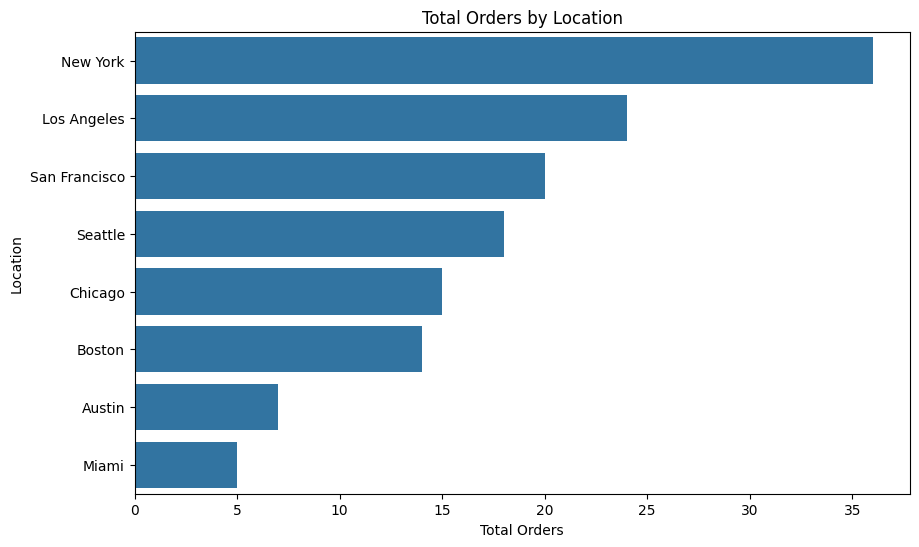

In [77]:
# Total number of orders from each city
total_orders_by_location = df.groupby("Location")["Total Orders"].sum().reset_index().sort_values(by="Total Orders", ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=total_orders_by_location['Total Orders'], y=total_orders_by_location['Location'])
plt.title('Total Orders by Location')
plt.xlabel('Total Orders')
plt.ylabel('Location')
plt.show()

# Chart 2 - Average income generated from location

In [78]:
# Revenue generated from each city
df.groupby("Location")["Amount (USD)"].sum().reset_index().sort_values(by='Amount (USD)', ascending=False)

,Location,Amount (USD)
5,New York,35.0
3,Los Angeles,31.0
7,Seattle,22.5
6,San Francisco,21.5
1,Boston,14.0
0,Austin,13.0
4,Miami,11.0
2,Chicago,8.5


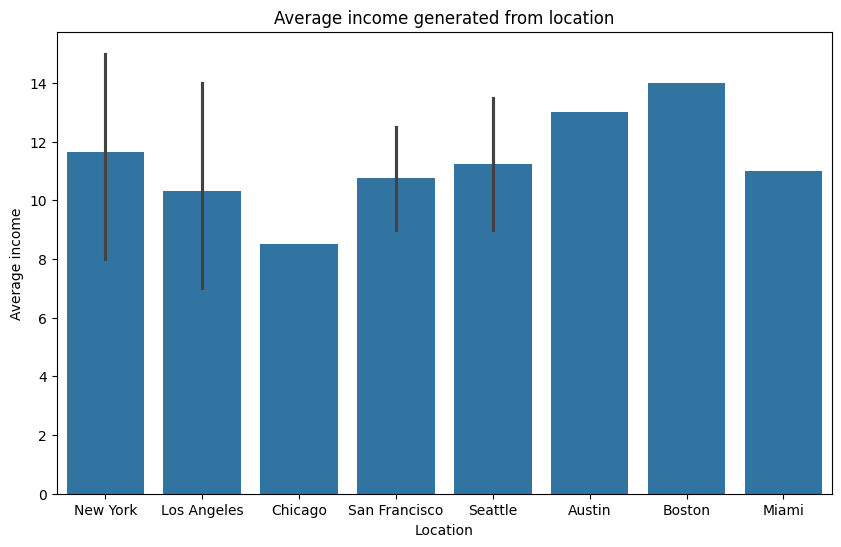

In [79]:
#Average income generated from location
plt.figure(figsize=(10, 6))
sns.barplot(x='Location', y='Amount (USD)', data=df)
plt.title('Average income generated from location')
plt.xlabel('Location')
plt.ylabel('Average income')
plt.show()

# Chart 3 - Favorite Meal Distribution

In [80]:
#Number of orders by Favorite Meal
df.groupby("Favorite Meal")["Total Orders"].sum().reset_index().sort_values(by='Total Orders', ascending=False)

,Favorite Meal,Total Orders
1,Dinner,68
2,Lunch,42
0,Breakfast,29


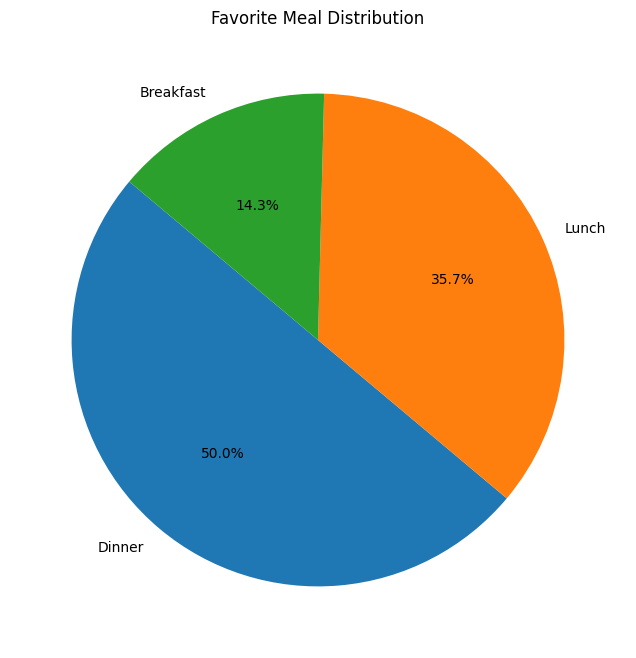

In [81]:
# Favorite Meal Distribution
plt.figure(figsize=(8, 8))
counts = df['Favorite Meal'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Favorite Meal Distribution')
plt.show()

# Chart 4 -Total Orders by Dish Name

In [82]:
#Number of orders by Dish Name
df.groupby("Dish Name")["Total Orders"].sum().reset_index().sort_values(by='Total Orders', ascending=False)

,Dish Name,Total Orders
4,Spaghetti,44
1,Grilled Chicken,28
0,Caesar Salad,27
3,Pancakes,27
2,Oatmeal,8
5,Veggie Burger,5


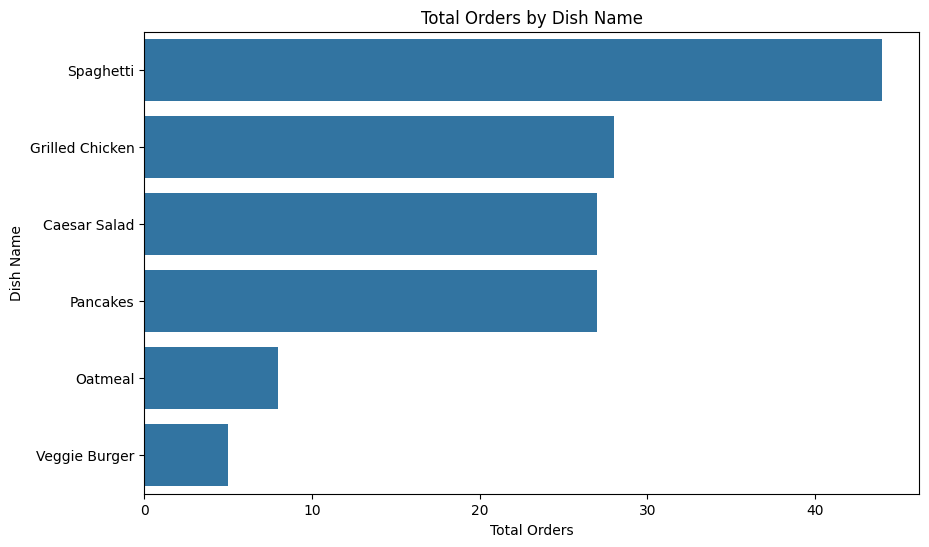

In [83]:
# Total number of orders for each dish
total_orders_by_Dish_Name = df.groupby("Dish Name")["Total Orders"].sum().reset_index().sort_values(by='Total Orders', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=total_orders_by_Dish_Name['Total Orders'], y=total_orders_by_Dish_Name['Dish Name'])
plt.title('Total Orders by Dish Name')
plt.xlabel('Total Orders')
plt.ylabel('Dish Name')
plt.show()

# Chart 5 - Meal Type Distribution

In [84]:
#Number of orders by Meal Type
df.groupby("Meal Type")["Total Orders"].sum().reset_index().sort_values(by='Total Orders', ascending=False)

,Meal Type,Total Orders
1,Dinner,72
0,Breakfast,35
2,Lunch,32


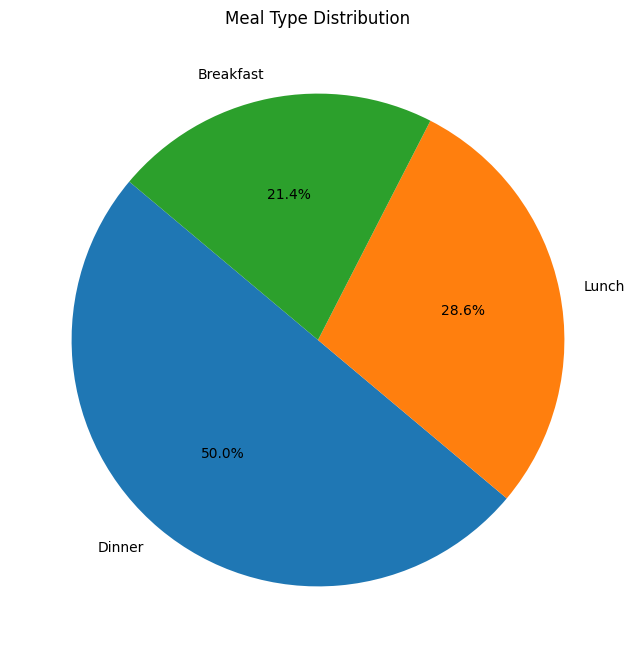

In [85]:
# Meal Type Distribution
plt.figure(figsize=(8, 8))
counts = df['Meal Type'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Meal Type Distribution')
plt.show()

### Manipulations I did and insights I found:

Dropped rows with missing 'Rating' to maintain essential information.

Grouped data by Location and Total Orders, Amount to understand the total number of orders and revenue generated from each city.
- New York has the Maximum Number of orders with 36
- Miami has the Minimum Number of orders with 5
- New York generated the highest revenue at 35.0
- Chicago generated the lowest revenue at 8.5

I found that Dinner is favorite meal among other meals.

Among all meal types, dinner has the highest number of orders.

Spaghetti has the highest number of orders, while Veggie Burger has the lowest.

## **Solution to Business Objective**

Boost Marketing in New York: Since New York has the most orders, focus more on advertising and promotions there to keep growing sales.

Promote Miami More: Miami has the fewest orders, so run special offers or discounts to encourage more customers to order.

Encourage More Dinner Orders: Since dinner is the most popular meal, offer dinner specials or deals to attract even more dinner orders.

Improve Sales in Chicago: Chicago has the lowest revenue, so consider changing the menu, offering discounts, or running ads to get more people to order.

Highlight Spaghetti and Improve Veggie Burger: Spaghetti is the most popular dish, so promote it more. For the Veggie Burger, try making it more appealing by changing its ingredients or promoting it better.

# **Conclusion**

By leveraging these insights and recommendations, clients can make informed decisions to enhance their market presence, optimize orders frequency rates, and maximize revenue in the  market.